# The Hurst Exponent

The Hurst Exponent (H) is a measure of the long-term memory of a time series, derived by hydrologist Harold Edwin Hurst. It quantifies the tendency of a time series to either regress strongly to the mean or cluster in a particular direction. Traders usually use the Hurst Exponent to determine whether a market is trending, mean-reverting, or following a random walk, helping them to select appropriate trading strategies.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### Retrieve Data

In [45]:
ticker = 'META'
data = yf.download(ticker, start="2019-01-01", end="2024-01-01")
time_series = data['Close'].values

[*********************100%%**********************]  1 of 1 completed


### Hurst Exponent

The Hurst exponent is calculated by examining the relationship between the time lag ($l$) and the standard deviation ($τ$) of the time series differences. The formula involves plotting the logarithm of $τ(l)$ against the logarithm of $l$ and finding the slope of the resulting line. The slope, divided by 2, gives the Hurst exponent ($H$):

$ H = \frac{\text{slope}}{2} $

where:

$ \tau(l) = \sqrt{\text{std}(X_{t+l} - X_t)} $

and  $l$  is the lag.

In [3]:
def hurst_exponent(time_series):
    """
    Returns the Hurst Exponent of the time series
    """
    lags = range(2, 100)
    tau = [np.sqrt(np.std(np.subtract(time_series[lag:], time_series[:-lag]))) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    
    return poly[0]*2.0

### Strategy Selection 

The value of the Hurst exponent informs the selection of a trading strategy:

- H < 0.5: Mean-reversion strategies are appropriate, such as pairs trading or statistical arbitrage, which exploit the tendency of prices to revert to the mean.
- H ≈ 0.5: A random walk suggests market-neutral strategies, as there is no clear trend or mean-reverting behavior.
- H > 0.5: Trend-following strategies are suitable, such as moving average crossovers or momentum trading, to capitalize on the persistence of trends in the price series.

In [6]:
def suggest_strategy(hurst):
    """
    Suggests a trading strategy based on the Hurst Exponent
    """
    if hurst < 0.5:
        return "Mean-reversion strategy (e.g., pairs trading, statistical arbitrage)"
    elif hurst > 0.5:
        return "Trend-following strategy (e.g., moving average crossover, momentum trading)"
    else:
        return "Random walk strategy (market neutral)"

In [48]:
hurst = hurst_exponent(time_series)
strategy = suggest_strategy(hurst)

print("Hurst exponent: ", hurst)
print("Suggested trading strategy: ", strategy)

Hurst exponent:  0.5529219170374138
Suggested trading strategy:  Trend-following strategy (e.g., moving average crossover, momentum trading)


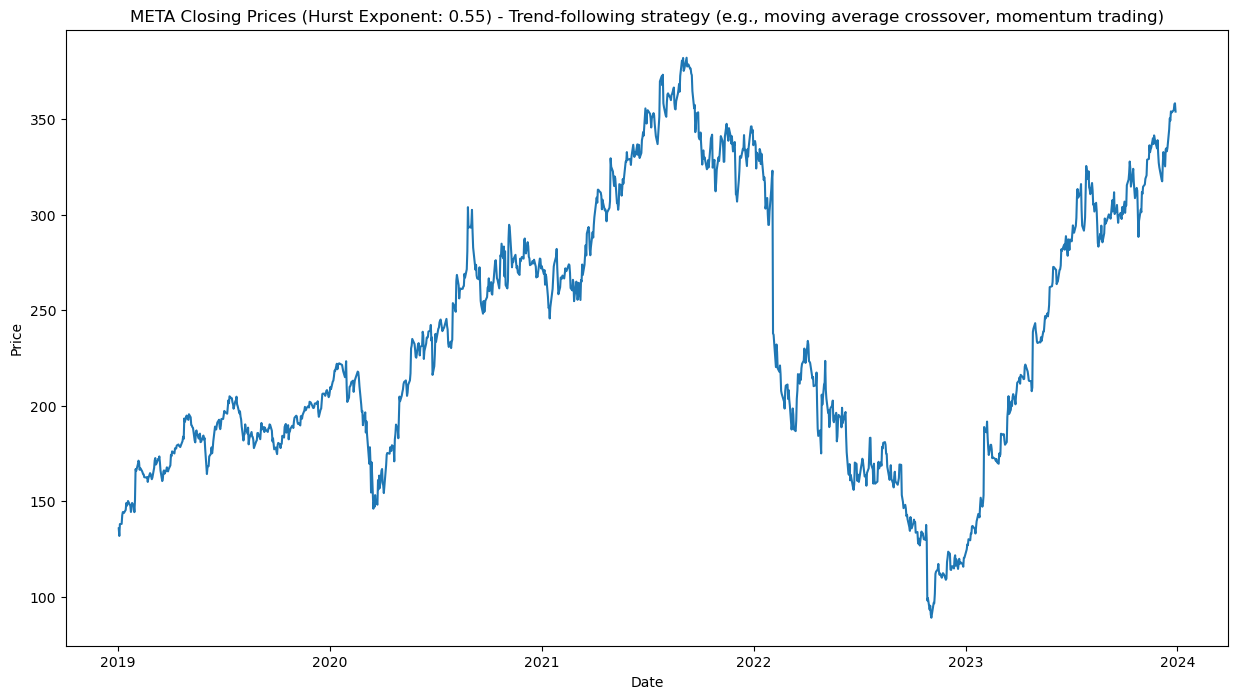

In [49]:
plt.figure(figsize=(15,8))
plt.plot(data['Close'])
plt.title(f"{ticker} Closing Prices (Hurst Exponent: {hurst:.2f}) - {strategy}")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()